In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

from sklearn.mixture import GaussianMixture

%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


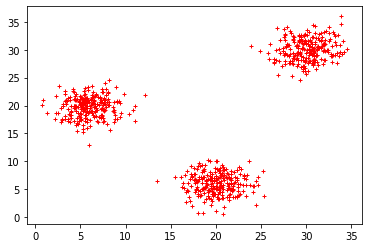

In [23]:
# simulate data
N = 1500

mean1 = [6, 20]
mean2 = [20, 6]
mean3 = [30, 30]
cov = [[3.5, 0], [0, 3.5]]  # diagonal covariance

np.random.seed(50)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))

fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], 'r+', markersize=4)
fig.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


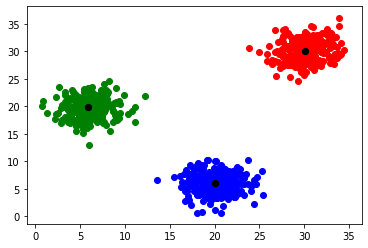

In [24]:
# use sklearn
object_em = GaussianMixture(n_components=3, random_state=0)
object_em.fit(X)

predicted_cluster = object_em.predict(X)
predicted_probability = object_em.predict_proba(X)

fig, ax = plt.subplots()

II_0 = np.where(predicted_cluster==0)
II_1 = np.where(predicted_cluster==1)
II_2 = np.where(predicted_cluster==2)
ax.scatter(X[II_0, 0], X[II_0, 1], color='green')
ax.scatter(X[II_1, 0], X[II_1, 1], color='blue')
ax.scatter(X[II_2, 0], X[II_2, 1], color='red')
ax.scatter(object_em.means_[:, 0], object_em.means_[:, 1], color='black', s=40)
fig.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


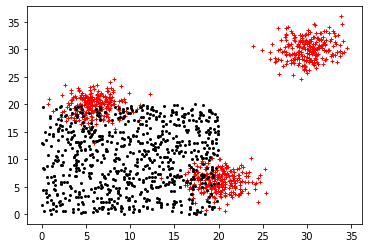

In [26]:
# add noise
noise = 20*np.random.rand(int(N/2), 2)

fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], 'r+', markersize=4)
ax.plot(noise[:, 0], noise[:, 1], 'k.', markersize=4)
X = np.concatenate((X, noise))
fig.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


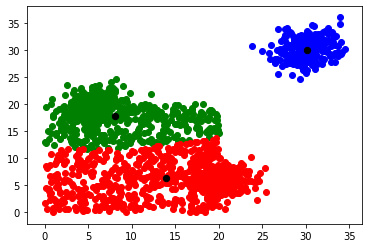

In [27]:
object_em = GaussianMixture(n_components=3, random_state=0)
object_em.fit(X)

predicted_cluster = object_em.predict(X)
predicted_probability = object_em.predict_proba(X)

fig, ax = plt.subplots()

II_0 = np.where(predicted_cluster==0)
II_1 = np.where(predicted_cluster==1)
II_2 = np.where(predicted_cluster==2)
ax.scatter(X[II_0, 0], X[II_0, 1], color='green')
ax.scatter(X[II_1, 0], X[II_1, 1], color='blue')
ax.scatter(X[II_2, 0], X[II_2, 1], color='red')
ax.scatter(object_em.means_[:, 0], object_em.means_[:, 1], color='black', s=40)
fig.show()